# Evaluate performance of rhyme metric

The goal of this notebook is to see how well the rhyme metric performs.
To evaluate the performance, we will use the metric on a set of randomly
selected songs with their lyrics unchanged and on two sets with modified
lyrics.

The lyrics modifications will be the following:
* removing the last word of random lines
* replacing the last word of random lines with another word

The modified datasets are stored in the data/cleaned/ directory. They were
generated using the functions `replace_last_words_on_line` and
`remove_last_word_on_line` from the `lyrics_analysis.modifications` module.
We used the probability 0.5 to modify a line and in the former case,
the words used to replace the original words were porcupine, armadillo
and anteater.

We will then compare the scores to scores generated randomly.


In [1]:
# imports
import ijson
import matplotlib.pyplot as plt
%matplotlib inline

from lyrics_analysis import Song
from lyrics_analysis import evaluation


c:\users\kristina\appdata\local\programs\python\python37\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


Define a generator that will generate song objects.

In [2]:
def retrieve_songs(file):
    with open(file) as f:
        songs = ijson.items(f, 'item')
        for song in songs:
            yield Song(
                song["lyrics"], song["genre"], song["artist"], song["title"]
            )


Define a dictionary that will store the scores.


In [3]:
scores = {
    "original_rhymes": [],
    "original_random": [],
    "removed_rhymes": [],
    "removed_random": [],
    "replaced_rhymes": [],
    "replaced_random": []
}


Now, calculate the scores. We will use the datasets of size 10000.


In [4]:
for song in retrieve_songs("../data/cleaned/eval_set_10000_lyrics.json"):
    score = evaluation.rhymes(song.lyrics)
    scores["original_rhymes"].append(score)
    
for song in retrieve_songs("../data/cleaned/eval_set_10000_lyrics.json"):
    score = evaluation.eval_random(song.lyrics)
    scores["original_random"].append(score)
    
for song in retrieve_songs("../data/cleaned/eval_set_10000_removed_words.json"):
    score = evaluation.rhymes(song.lyrics)
    scores["removed_rhymes"].append(score)
    
for song in retrieve_songs("../data/cleaned/eval_set_10000_removed_words.json"):
    score = evaluation.eval_random(song.lyrics)
    scores["removed_random"].append(score)
    
for song in retrieve_songs("../data/cleaned/eval_set_10000_replaced_words.json"):
    score = evaluation.rhymes(song.lyrics)
    scores["replaced_rhymes"].append(score)
    
for song in retrieve_songs("../data/cleaned/eval_set_10000_replaced_words.json"):
    score = evaluation.eval_random(song.lyrics)
    scores["replaced_random"].append(score)
    

Plot the scores to see how rhymes() compares to randomly generated scores.


Text(0, 0.5, 'n')

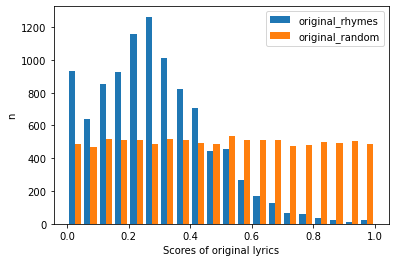

In [5]:
n_bins = 20
labels = ["original_rhymes", "original_random"]
data = [scores[label] for label in labels]
plt.hist(data, bins=n_bins)
plt.legend(labels)
plt.xlabel("Scores of original lyrics")
plt.ylabel("n")


Text(0, 0.5, 'n')

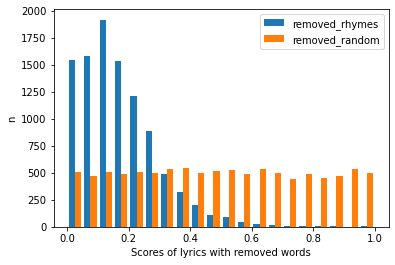

In [6]:
n_bins = 20
labels = ["removed_rhymes", "removed_random"]
data = [scores[label] for label in labels]
plt.hist(data, bins=n_bins)
plt.legend(labels)
plt.xlabel("Scores of lyrics with removed words")
plt.ylabel("n")


Text(0, 0.5, 'n')

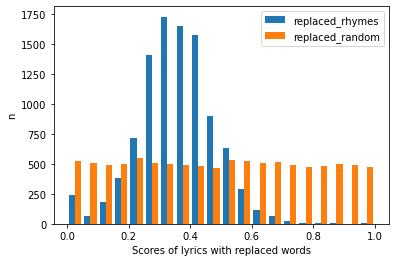

In [7]:
n_bins = 20
labels = ["replaced_rhymes", "replaced_random"]
data = [scores[label] for label in labels]
plt.hist(data, bins=n_bins)
plt.legend(labels)
plt.xlabel("Scores of lyrics with replaced words")
plt.ylabel("n")


Finally, compare the rhyme scores of original and modified lyrics.


Text(0, 0.5, 'n')

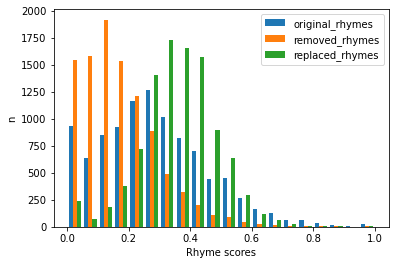

In [8]:
n_bins = 20
labels = ["original_rhymes", "removed_rhymes", "replaced_rhymes"]
data = [scores[label] for label in labels]
plt.hist(data, bins=n_bins)
plt.legend(labels)
plt.xlabel("Rhyme scores")
plt.ylabel("n")


We see that the metric behaves as expected: It is not random and when we
remove words that are expected to rhyme, the score decreases.
